<a href="https://colab.research.google.com/github/A-THAKUR22/AprilAssignments/blob/main/Assignment8April10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle Breast Cancer Wisconsin Diagnosis using Logistic Regression


It is given by Kaggle from UCI Machine Learning Repository, in one of its challenge
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data. It is a dataset of Breast Cancer patients with Malignant and Benign tumor.
Logistic Regression is used to predict whether the given patient is having Malignant or Benign tumor based on the attributes in the given dataset.

In [145]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [146]:
#Reading the data from the csv file
cancer_data=pd.read_csv('data (2).csv')
cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [147]:
#Displaying information about the data
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [148]:
#Checking for total null values in the data
cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [149]:
#Removing the null values from the dtaset
cancer_data=cancer_data.drop(columns='Unnamed: 32',axis=1)

In [150]:
cancer_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [151]:
#Description about the data
cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [152]:
#Performing Label encoding of the target variable's data
encoder=LabelEncoder()
cancer_data['diagnosis']=encoder.fit_transform(cancer_data['diagnosis'])
cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [153]:
#Checking the proportion of the number of values in data
cancer_data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

<Axes: xlabel='radius_mean', ylabel='Count'>

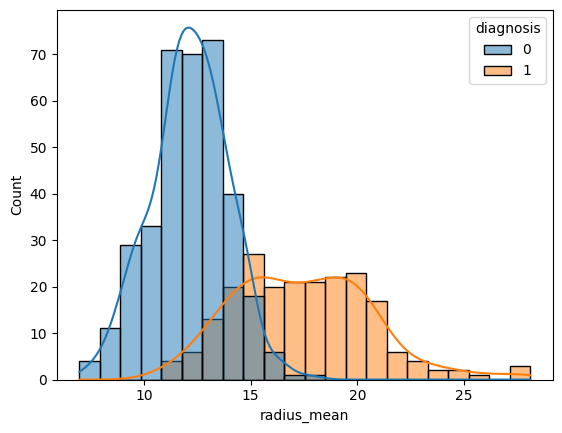

In [154]:
#Plotting the graphs of certain features with respect to the target variable
sns.histplot(data=cancer_data,x='radius_mean',hue='diagnosis',kde=True)

<Axes: xlabel='texture_mean', ylabel='Count'>

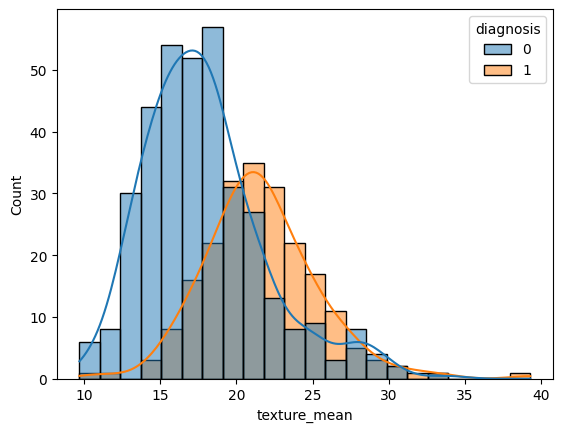

In [155]:
sns.histplot(data=cancer_data,x='texture_mean',hue='diagnosis',kde=True)

<Axes: xlabel='perimeter_mean', ylabel='Count'>

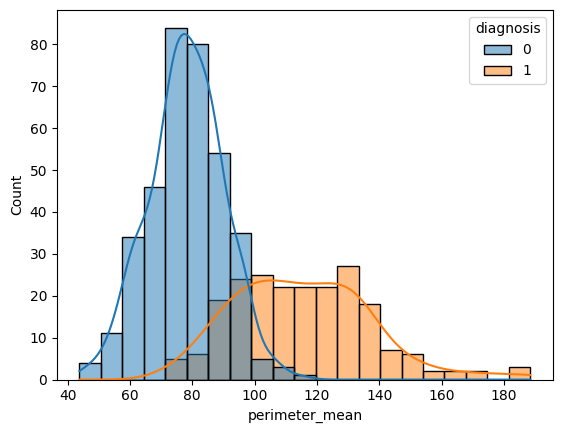

In [156]:
sns.histplot(data=cancer_data,x='perimeter_mean',hue='diagnosis',kde=True)

<Axes: xlabel='area_mean', ylabel='Count'>

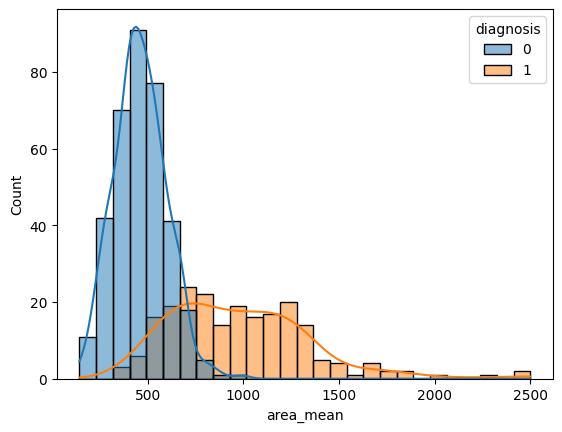

In [157]:
sns.histplot(data=cancer_data,x='area_mean',hue='diagnosis',kde=True)

<Axes: xlabel='smoothness_mean', ylabel='Count'>

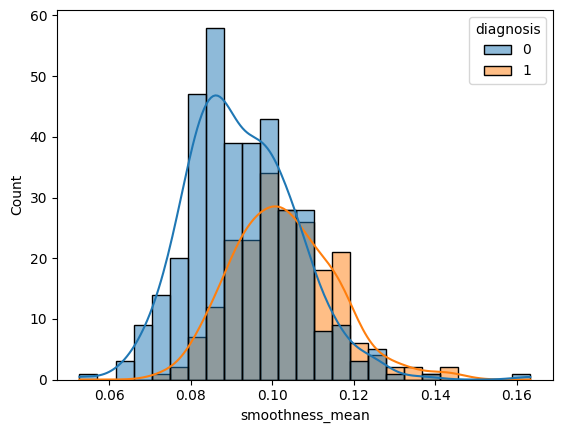

In [158]:
sns.histplot(data=cancer_data,x='smoothness_mean',hue='diagnosis',kde=True)

<Axes: xlabel='compactness_mean', ylabel='Count'>

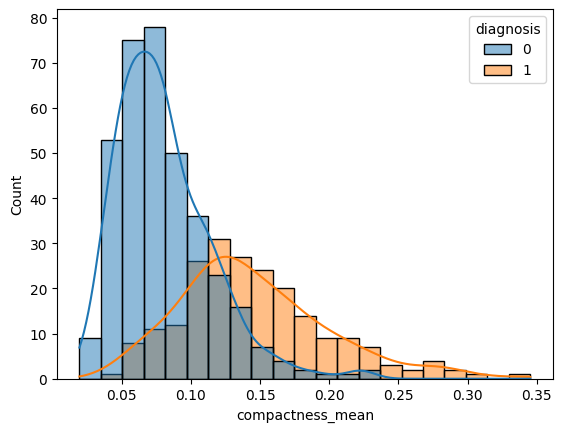

In [159]:
sns.histplot(data=cancer_data,x='compactness_mean',hue='diagnosis',kde=True)

<Axes: xlabel='concavity_mean', ylabel='Count'>

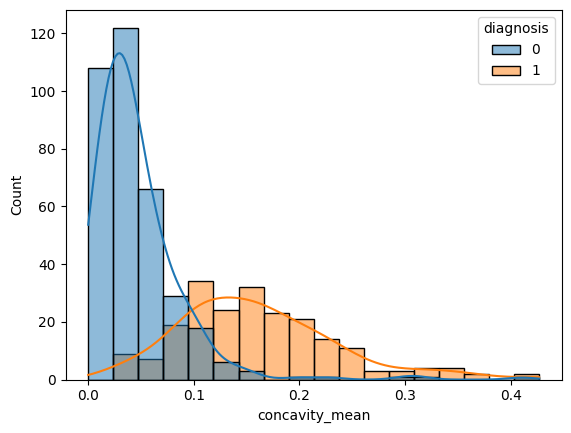

In [160]:
sns.histplot(data=cancer_data,x='concavity_mean',hue='diagnosis',kde=True)

<Axes: xlabel='concave points_mean', ylabel='Count'>

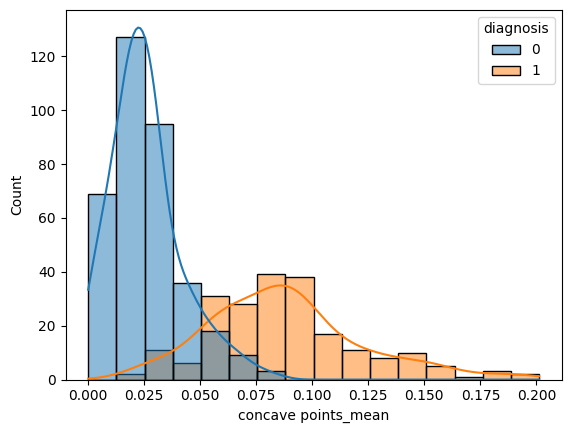

In [161]:
sns.histplot(data=cancer_data,x='concave points_mean',hue='diagnosis',kde=True)

<Axes: xlabel='symmetry_mean', ylabel='Count'>

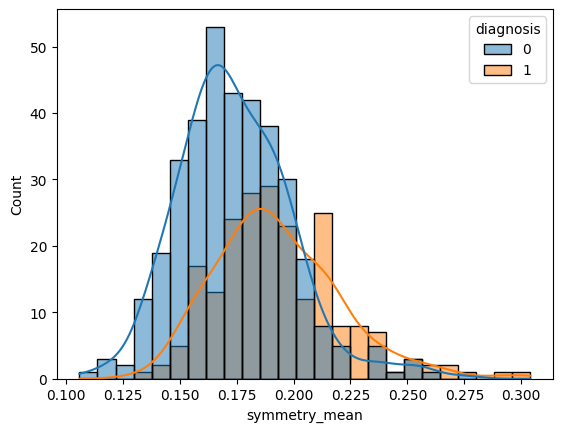

In [162]:
sns.histplot(data=cancer_data,x='symmetry_mean',hue='diagnosis',kde=True)

<Axes: xlabel='fractal_dimension_mean', ylabel='Count'>

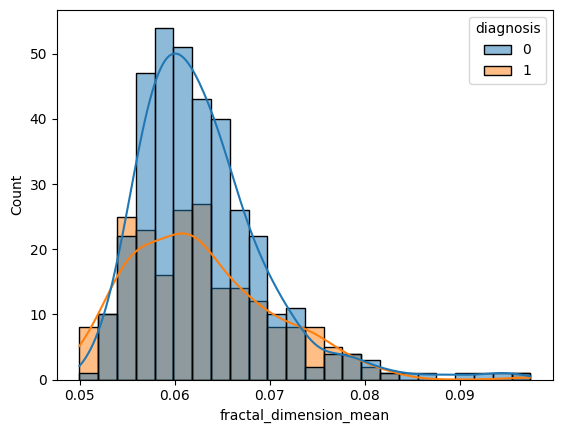

In [163]:
sns.histplot(data=cancer_data,x='fractal_dimension_mean',hue='diagnosis',kde=True)

<Axes: xlabel='radius_worst', ylabel='Count'>

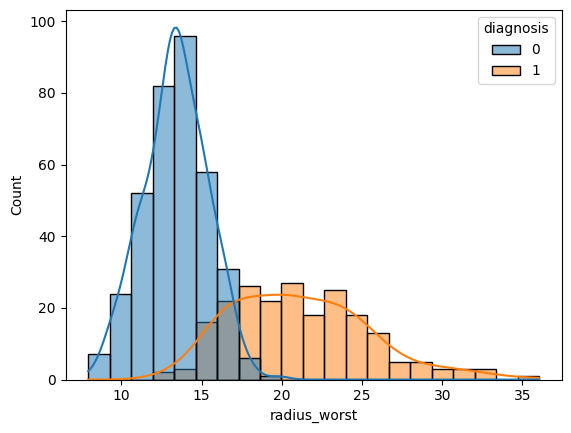

In [164]:
sns.histplot(data=cancer_data,x='radius_worst',hue='diagnosis',kde=True)

<Axes: xlabel='texture_worst', ylabel='Count'>

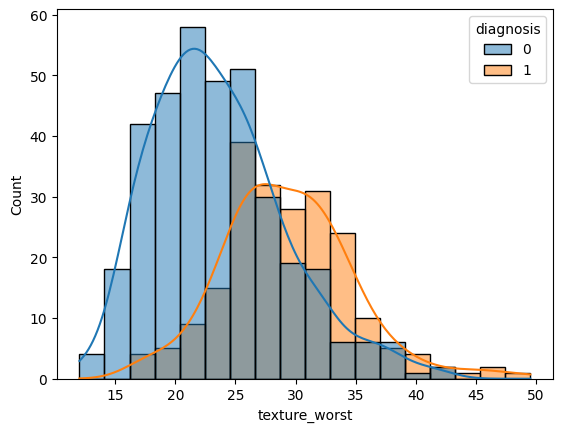

In [165]:
sns.histplot(data=cancer_data,x='texture_worst',hue='diagnosis',kde=True)

<Axes: xlabel='perimeter_worst', ylabel='Count'>

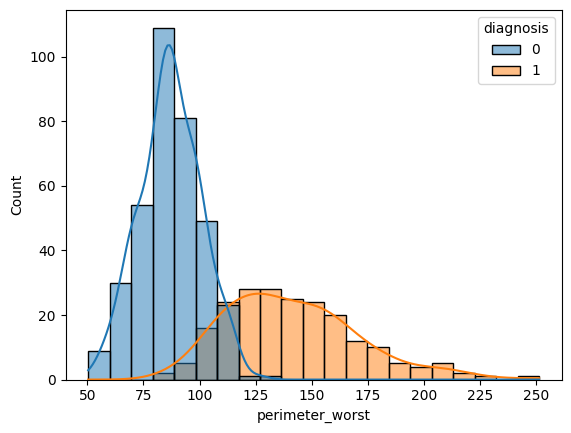

In [166]:
sns.histplot(data=cancer_data,x='perimeter_worst',hue='diagnosis',kde=True)

<Axes: xlabel='area_worst', ylabel='Count'>

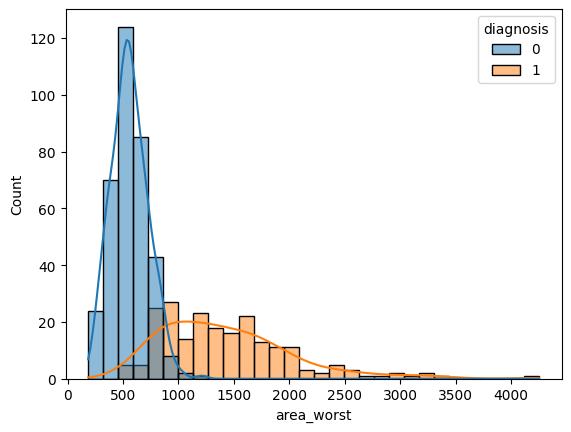

In [167]:
sns.histplot(data=cancer_data,x='area_worst',hue='diagnosis',kde=True)

<Axes: >

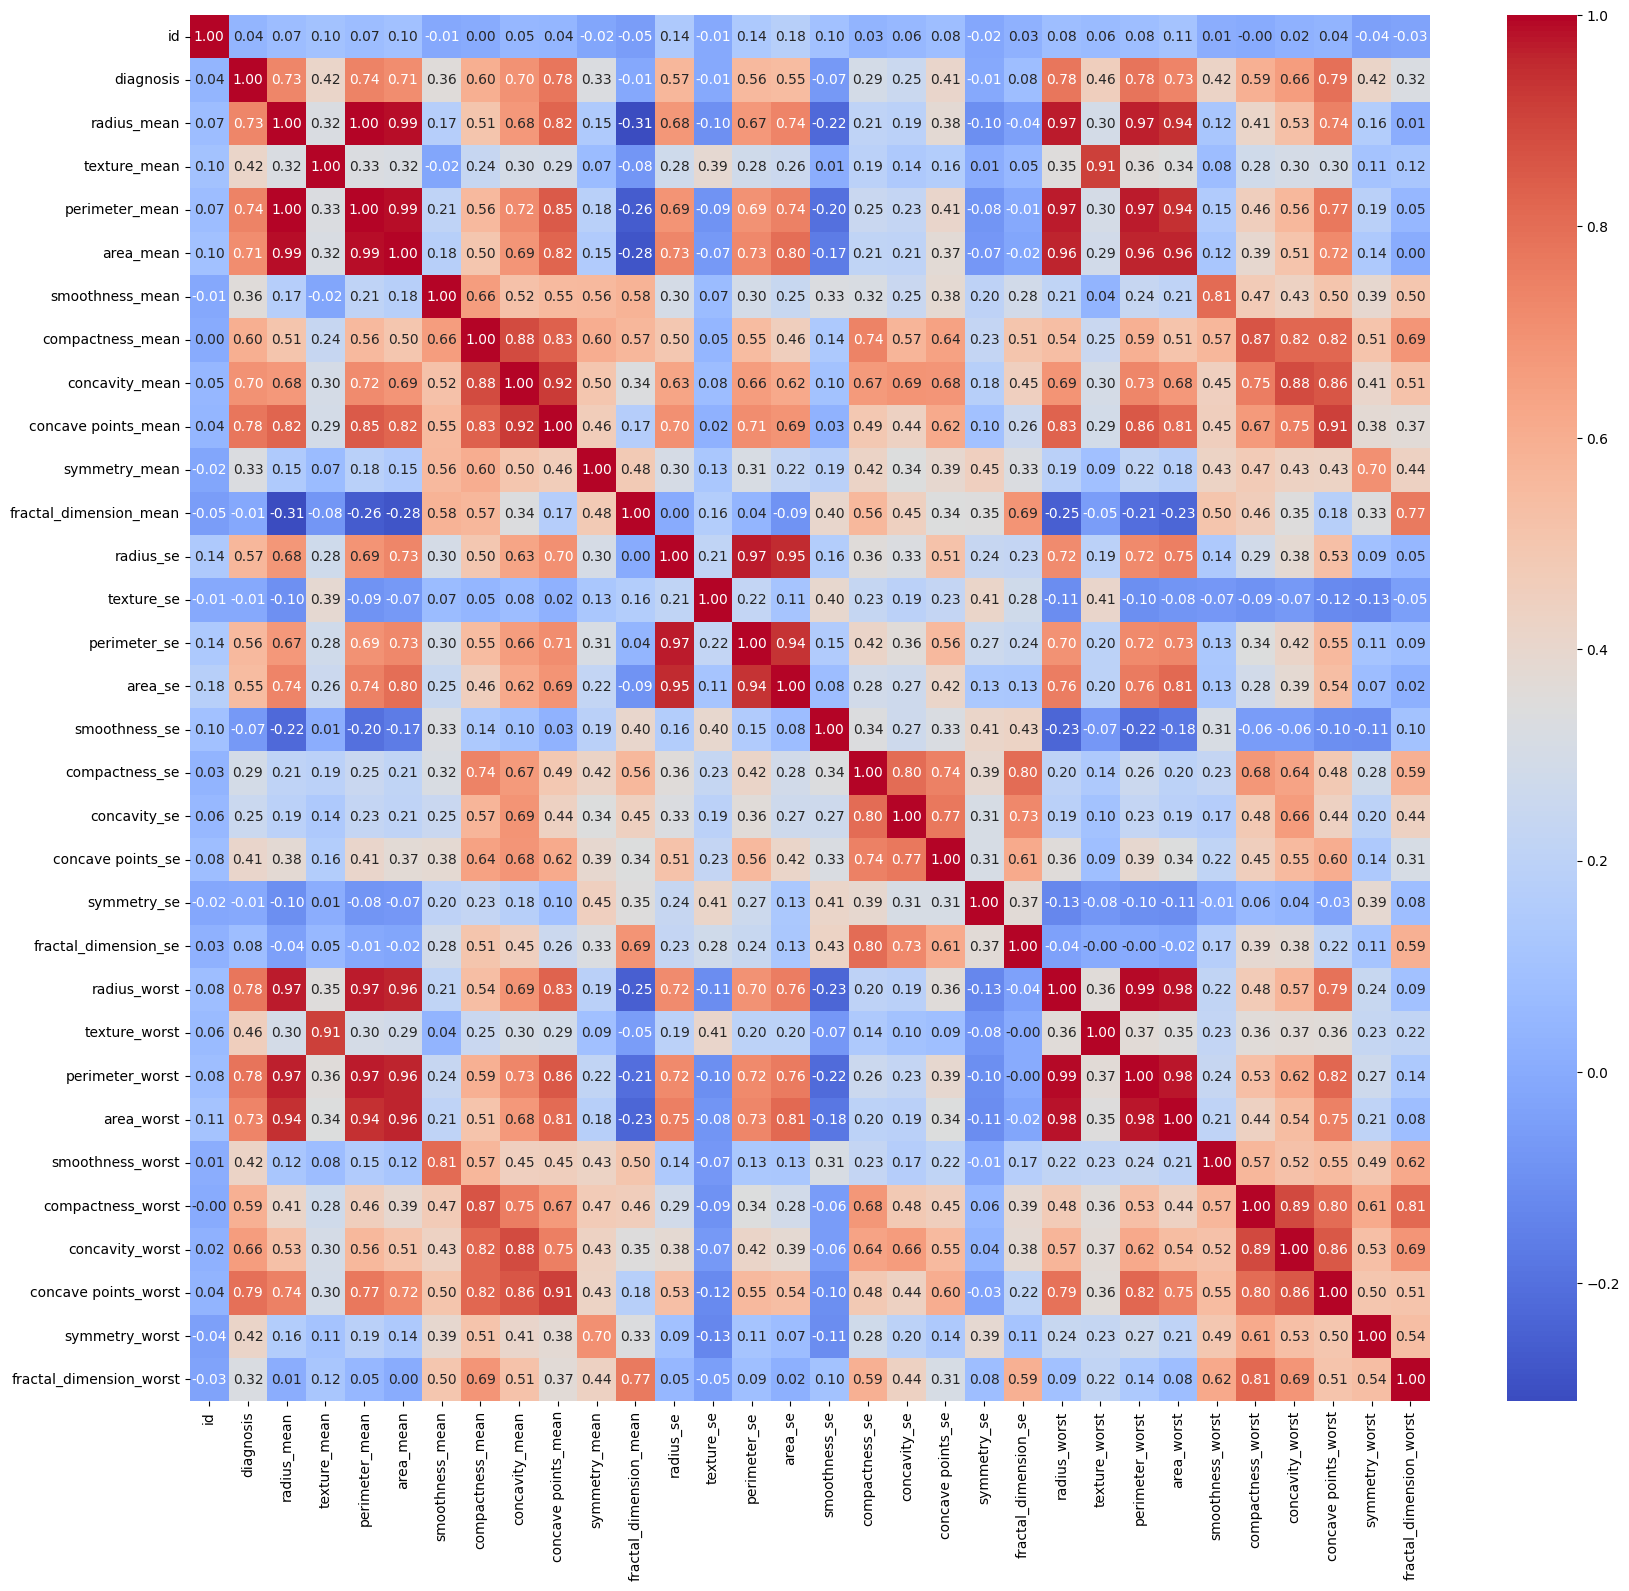

In [168]:
#Plotting a heat map of the data based on the correlation between all the variables present in them
correlation=cancer_data.corr()
plt.figure(figsize=(20,18))
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f')

In [169]:
#Checking correlation of the trget variable with other variables
corr_diagnosis=correlation.corr()['diagnosis'].drop('diagnosis')
corr_diagnosis

id                        -0.142894
radius_mean                0.916499
texture_mean               0.424297
perimeter_mean             0.923690
area_mean                  0.899752
smoothness_mean            0.075918
compactness_mean           0.559472
concavity_mean             0.801002
concave points_mean        0.928733
symmetry_mean             -0.025469
fractal_dimension_mean    -0.562630
radius_se                  0.692977
texture_se                -0.634971
perimeter_se               0.694385
area_se                    0.746477
smoothness_se             -0.797063
compactness_se            -0.137555
concavity_se              -0.098808
concave points_se          0.203895
symmetry_se               -0.683275
fractal_dimension_se      -0.522351
radius_worst               0.937691
texture_worst              0.467273
perimeter_worst            0.944673
area_worst                 0.919769
smoothness_worst           0.176051
compactness_worst          0.559060
concavity_worst            0

In [170]:
#Dividing the data in (X) features and (y) target variable
X=cancer_data.drop(columns=['diagnosis','fractal_dimension_worst','id','smoothness_mean','concavity_se','symmetry_mean','smoothness_se','symmetry_se','fractal_dimension_se','fractal_dimension_mean'])
y=cancer_data['diagnosis']

In [171]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,texture_se,perimeter_se,...,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,0.9053,8.589,...,0.01587,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,0.7339,3.398,...,0.01340,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,0.7869,4.585,...,0.02058,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.28390,0.24140,0.10520,0.4956,1.1560,3.445,...,0.01867,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,0.7813,5.438,...,0.01885,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,1.2560,7.673,...,0.02454,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,2.4630,5.203,...,0.01678,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.4564,1.0750,3.425,...,0.01557,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,20.60,29.33,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,1.5950,5.772,...,0.01664,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


In [172]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [173]:
#Splitting the data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Scaling the values of traing and testing features
scaler=StandardScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

#Training the model
model=LogisticRegression()
model.fit(X_train_s,y_train)

LogisticRegression()

In [174]:
#Making predictions based on the test data
y_predict=model.predict(X_test_s)
print(f'Predictions for type of cancer using testing data: {y_predict}')

Predictions for type of cancer using testing data: [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


In [175]:
#Checking accuracy of our model with testing data
Accuracy=accuracy_score(y_test,y_predict)
print(f'Accuracy of our model to predict the type of cancer : {Accuracy}')

Accuracy of our model to predict the type of cancer : 0.9912280701754386


In [176]:
#Checking accuracy of our model with training data
ypred2=model.predict(X_train_s)
acc2=accuracy_score(y_train,ypred2)
acc2

0.9868131868131869